## Exercici 1
**Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.**

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from matplotlib import pyplot


In [2]:
df = pd.read_csv('Publicacions Facebook Thailandia.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
#verificamos que valores hay en status_id
df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [4]:
#verificamos valores en status_published
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [5]:
#matriz de 7050 filas y 16 columnas, donde explica las reacciones publicadas en el facebook de Thailandia entre los años 2016 y 2018
df.shape

(7050, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [7]:
# comprobamos la distribución de las diferentes formas de reacción
df['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

[]

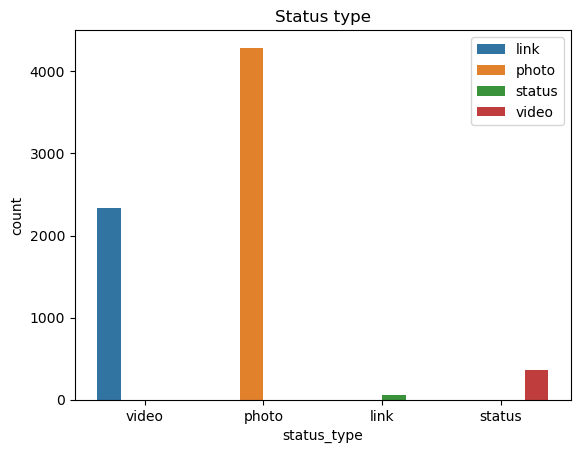

In [8]:
fig = sns.countplot(x='status_type', hue='status_type', data=df)
fig.set_title('Status type')
fig.set_xlabel('status_type')
fig.set_ylabel('count')
fig.legend(labels = ['link', 'photo', 'status', 'video'])

fig.plot()

In [22]:
# codificamos status_type
y = df['status_type']

In [23]:
le = LabelEncoder()

df['status_type'] = le.fit_transform(df['status_type'])

y = le.transform(y)

In [9]:
#comprobamos si hay valores nulos
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [10]:
# Borramos las columnas que no nos aportan nada, porqué están vacias o porque los datos no son sujeto a estudio en este trabajo
df.drop(['Column1', 'Column2', 'Column3', 'Column4', 'status_id', 'status_published'], axis=1, inplace=True)

In [11]:
# revisamos si hay diferencia entre las medias y la covariancia para verificar si hay muchos outliers, en este casi si
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


<IPython.core.display.Javascript object>

<AxesSubplot:>

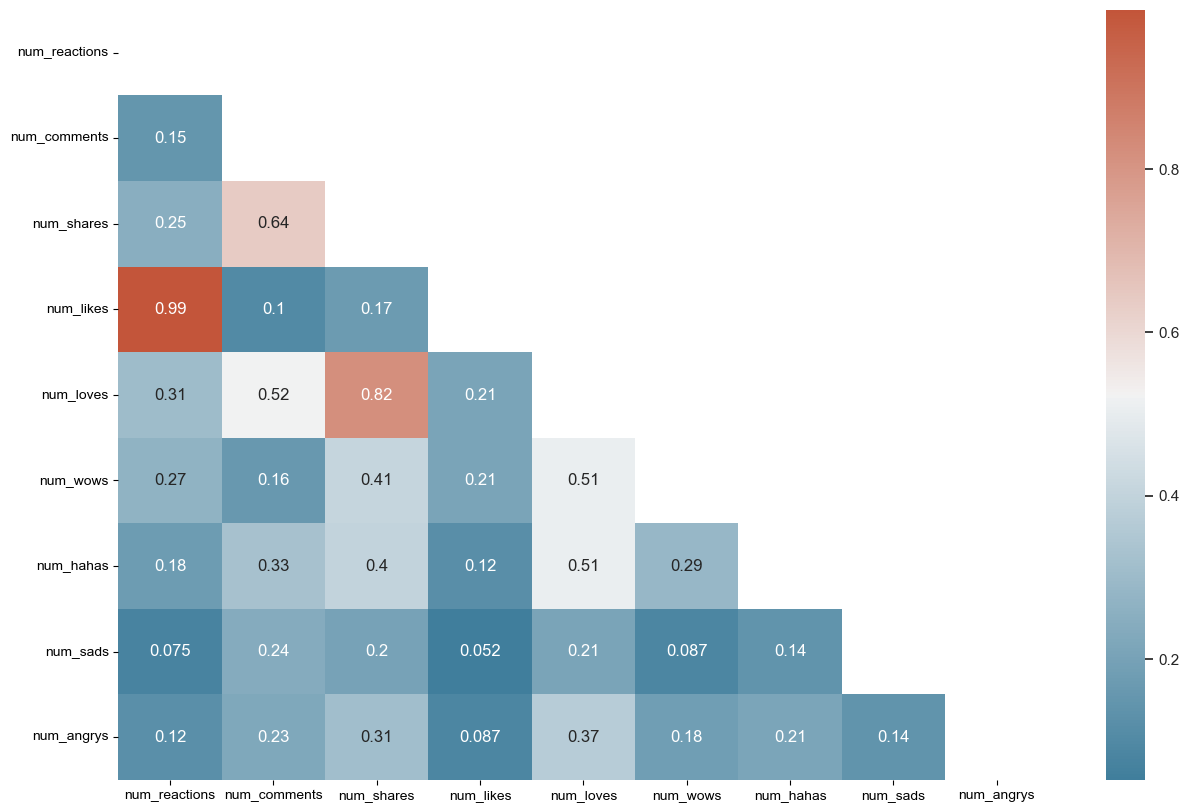

In [12]:
# matriz de correlación
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_theme(style="white")
matrix = np.triu(df.corr())
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap=cmap)

In [13]:
# revisamos las diferentes respuestas para ver si hay alguna relación, y nos encontramos que las columnas de num_likes, num_loves, num_wows, num_hahas, num_sads y num_angrys se pueden explicarcon la columna de num_reactions
df[['num_shares','num_comments','num_reactions','num_likes','num_loves','num_wows', 'num_hahas', 'num_sads', 'num_angrys']].sample(10)

,num_shares,num_comments,num_reactions,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
1482,0,2,17,17,0,0,0,0,0
1139,4,7,2025,2025,0,0,0,0,0
6719,0,4,125,125,0,0,0,0,0
6810,357,7572,558,457,72,12,6,8,3
5255,0,0,6,6,0,0,0,0,0
1502,3,25,294,294,0,0,0,0,0
2967,1,2,87,85,2,0,0,0,0
5007,0,0,13,13,0,0,0,0,0
4478,22,112,799,788,4,7,0,0,0
6060,428,1532,336,226,104,2,2,1,1


In [14]:
# creamos columna entendiendo que el num total de reacciones es la suma de las tres columnas principales
df['num_interacciones'] = df['num_shares'] + df['num_comments'] + df['num_reactions']

In [15]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_interacciones
0,video,529,512,262,432,92,3,1,1,0,1303
1,photo,150,0,0,150,0,0,0,0,0,150
2,video,227,236,57,204,21,1,1,0,0,520
3,photo,111,0,0,111,0,0,0,0,0,111
4,photo,213,0,0,204,9,0,0,0,0,213


<AxesSubplot:>

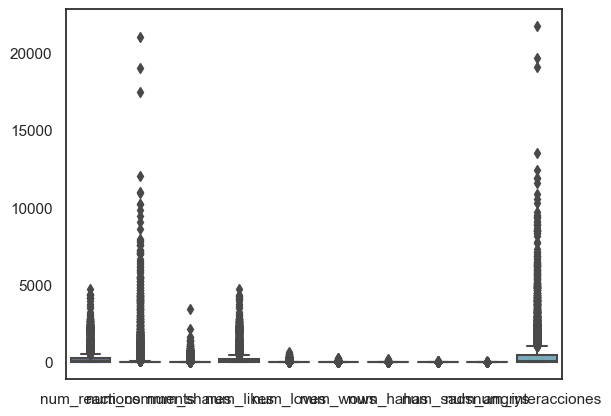

In [16]:
# Revisamos Outliers de cada variable
sns.boxplot(data=df)

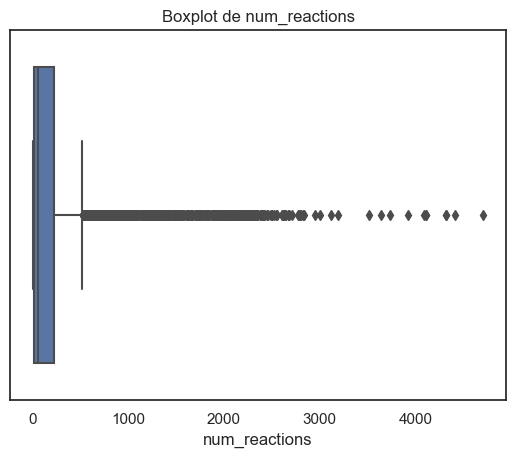

In [17]:
fa = df['num_reactions']
sns.boxplot(x=fa).set_title('Boxplot de num_reactions');

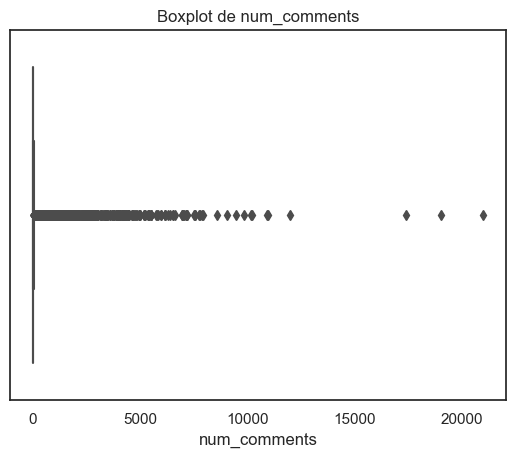

In [18]:
fa = df['num_comments']
sns.boxplot(x=fa).set_title('Boxplot de num_comments');

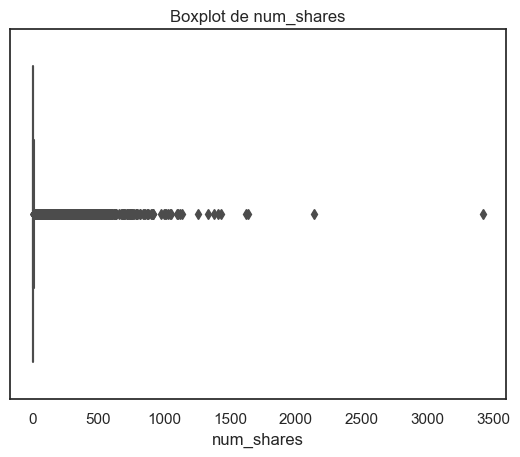

In [19]:
fa = df['num_shares']
sns.boxplot(x=fa).set_title('Boxplot de num_shares');

In [26]:
# escogemos el robustscaler para normalizar nuestro dataset debido al num de outliers
scaled_df = [ 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

df_def = df.copy()
scaler = RobustScaler()
df_def[scaled_df] = scaler.fit_transform(df_def[scaled_df])
df_def

<IPython.core.display.Javascript object>

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_interacciones
0,3,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0,1303
1,1,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0,150
2,3,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0,520
3,1,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0,111
4,1,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0,213
...,...,...,...,...,...,...,...,...,...,...,...
7045,1,0.146040,-0.173913,0.00,0.184799,0.000000,0.0,0.0,0.0,0.0,89
7046,1,-0.215347,-0.173913,0.00,-0.262295,0.333333,0.0,1.0,0.0,0.0,16
7047,1,-0.284653,-0.173913,0.00,-0.339791,0.333333,0.0,0.0,0.0,0.0,2
7048,1,1.443069,0.347826,5.50,1.734724,0.666667,0.0,0.0,0.0,0.0,385


In [27]:
# aplicamos PCA, técnica para reducir dimensiones reteniendo toda la información posible.
pca = PCA().fit(df_def)

In [28]:
pca.explained_variance_ratio_

array([9.99239803e-01, 4.55277170e-04, 2.12016079e-04, 5.23273544e-05,
       2.95694331e-05, 8.33502735e-06, 1.79052761e-06, 5.42168807e-07,
       3.39310984e-07, 1.80343265e-13, 1.01942119e-36])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

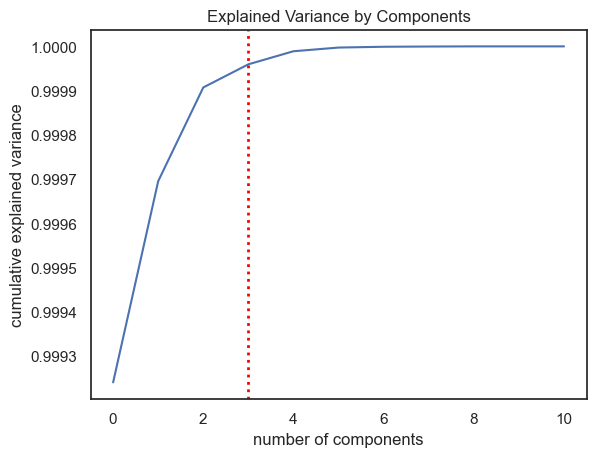

In [29]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance by Components')
plt.xlabel('number of components')
plt.axvline(x = 3, ymin = 0, color = 'red', linewidth =2, ls = ':' )
plt.ylabel('cumulative explained variance');

In [30]:
# creemos que el num de componentes deberia ser 3, ja que explicaria casi mas del 95% de los datos
pca = PCA(n_components=3)
pca.fit(df_def)
df_pca = pca.transform(df_def)
display(pd.DataFrame(df_pca, columns=['Component_1','Component_2','Component_3']).describe())

,Component_1,Component_2,Component_3
count,7.050000e+03,7.050000e+03,7.050000e+03
mean,-2.675672e-13,2.840905e-14,-1.589650e-15
std,1.152973e+03,2.461060e+01,1.679456e+01
min,-4.946871e+02,-4.321184e+02,-1.414992e+02
25%,-4.756883e+02,-2.965787e+00,6.274738e-01
50%,-4.257279e+02,-9.568668e-01,4.110196e+00
75%,-7.521143e+01,-4.850678e-01,4.993764e+00
max,2.122691e+04,6.953492e+02,2.399313e+02


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

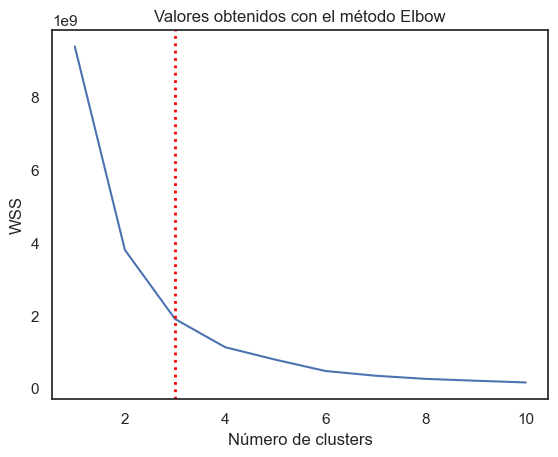

In [31]:
wcss = []  # creamos una lista para almacenar los valores que nos devuelva el modelo con cada grupo de nodos
for i in range(1,11):  # probamos el modelo con con un nodo y vamos aumentando hasta 10 nodos
    kmeans = KMeans(n_clusters=i, random_state= 0)  
    kmeans.fit(df_pca)  
    wcss.append(kmeans.inertia_)  

plt.plot(range(1, 11), wcss)  
plt.title('Valores obtenidos con el método Elbow')  
plt.xlabel('Número de clusters')  
plt.axvline(x = 3, ymin = 0, color = 'red', linewidth =2, ls = ':' )
plt.ylabel('WSS');

In [32]:
# teniendo en cuenta el metodo del codo, aplicaremos 3 clusters
cl_3 = KMeans(n_clusters=3, random_state = 0)
cl_3.fit(df_pca)
labels = cl_3.labels_

In [33]:
cl_3.cluster_centers_

array([[-3.24783084e+02, -4.62471848e-01,  2.08039973e+00],
       [ 6.53989761e+03,  2.44292452e+00,  3.85686915e+01],
       [ 1.65280180e+03,  3.32726130e+00, -2.19924485e+01]])

In [34]:
cl_3.inertia_

1901473641.3465948

In [35]:
prediction = cl_3.predict(df_pca)
prediction

array([2, 0, 0, ..., 0, 0, 0])

In [36]:
df_def['Predicted clusters K-M'] = prediction
df_def['Predicted clusters K-M']= cl_3.labels_
df_def.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_interacciones,Predicted clusters K-M
0,3,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0,1303,2
1,1,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0,150,0
2,3,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0,520,0
3,1,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0,111,0
4,1,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0,213,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

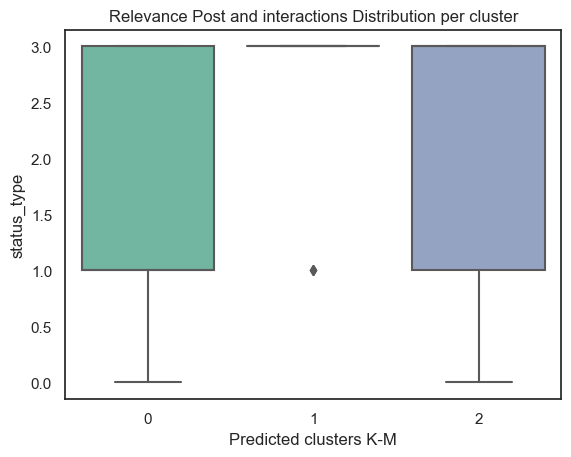

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

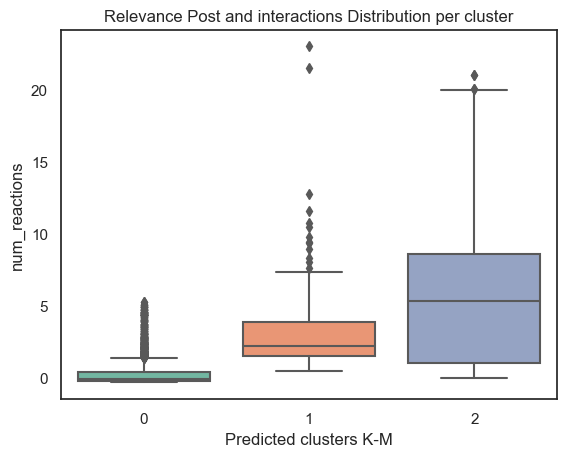

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

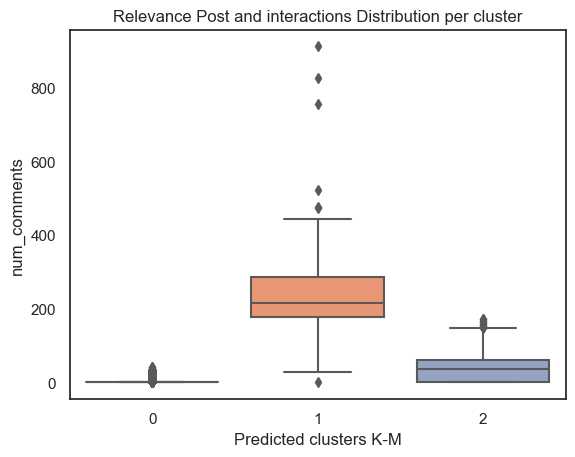

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

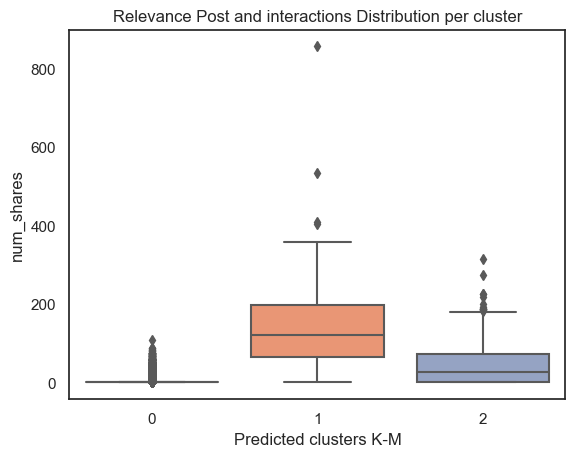

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

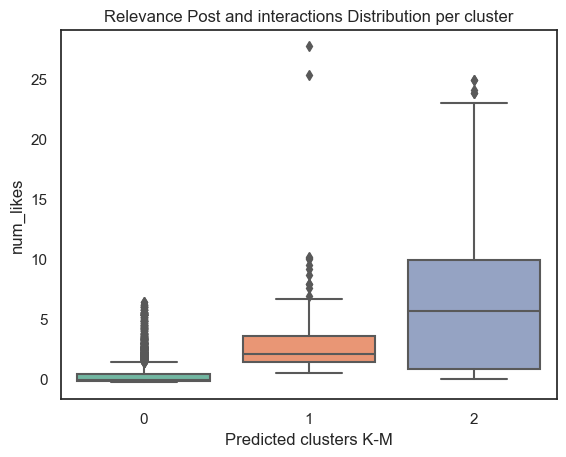

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

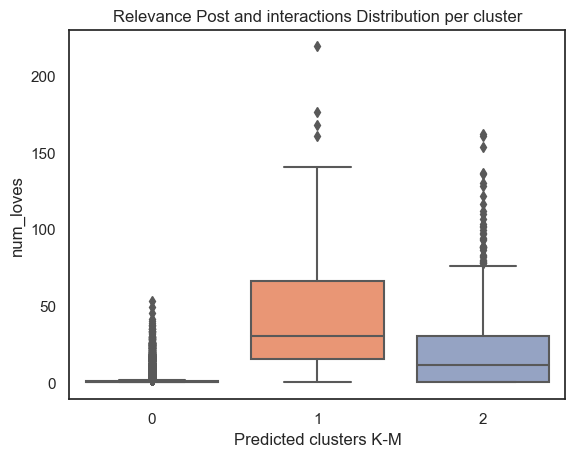

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

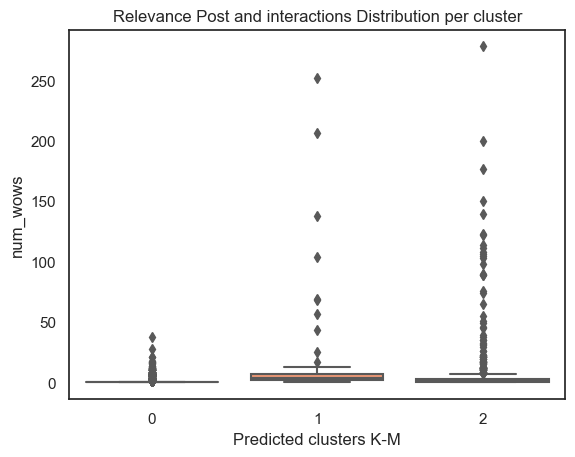

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

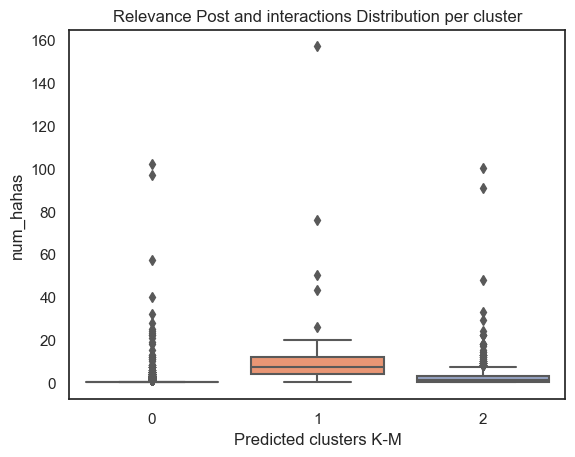

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

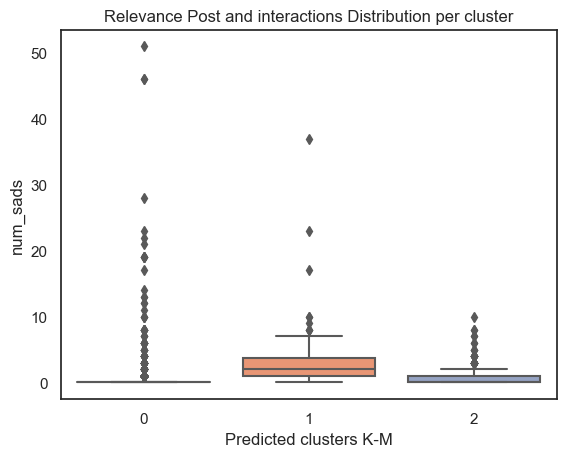

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

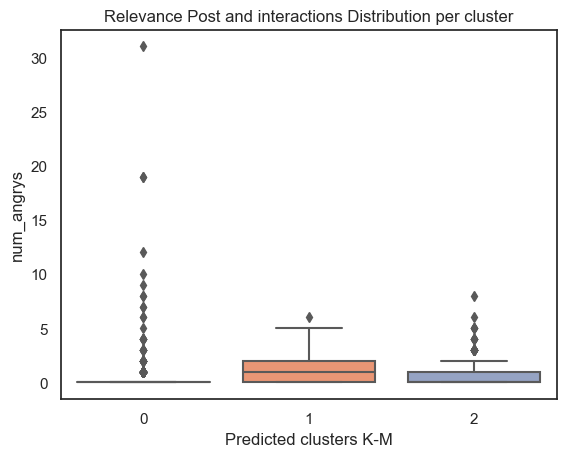

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

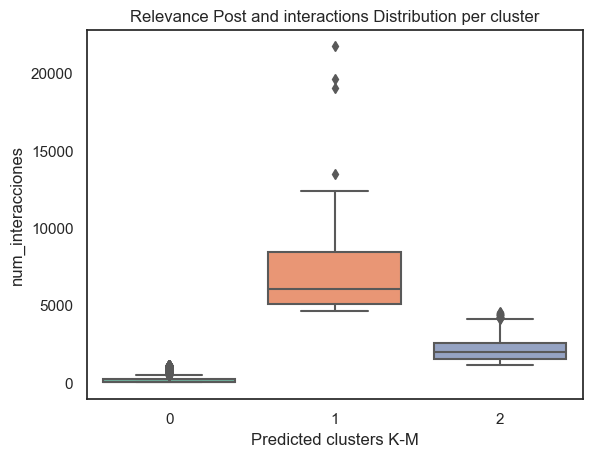

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

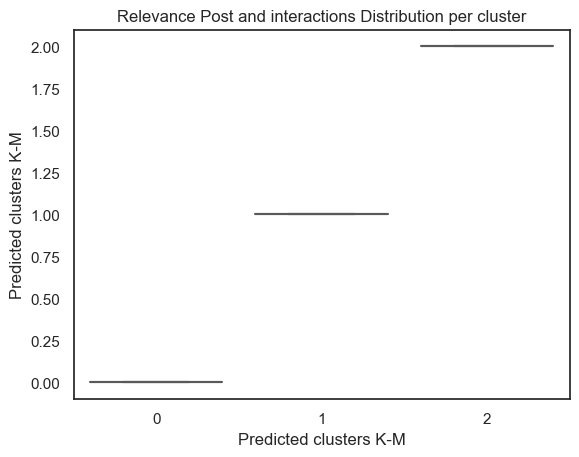

In [37]:
for i in df_def:
    sns.boxplot(data = df_def, y = i, x = "Predicted clusters K-M", palette = "Set2")
    plt.title("Relevance Post and interactions Distribution per cluster".format(i))
    plt.show()

## Exercici 2
**Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

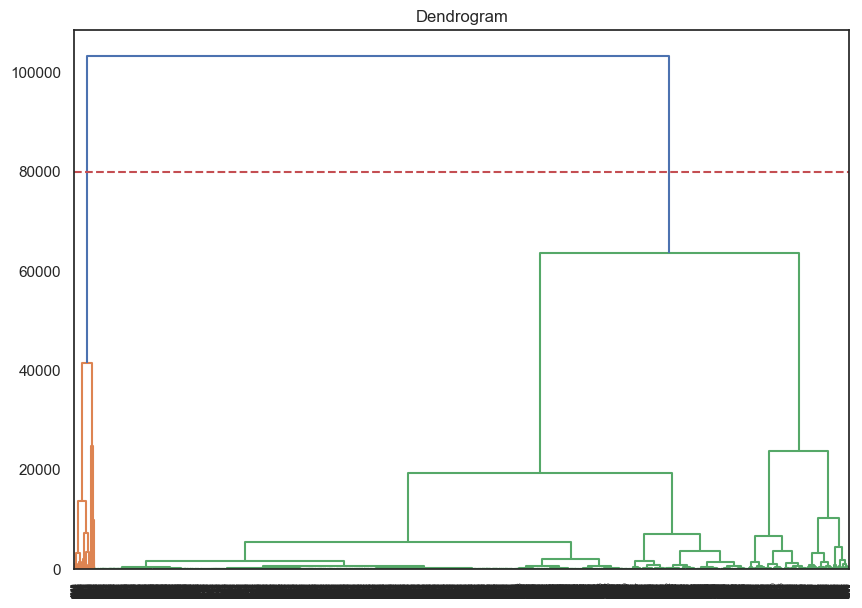

In [38]:
# En este jercicico usaremos el método Ward, la distancias entre clústeres es la suma del cuadrado de las diferencias dentro de todos los clústeres.
plt.figure(figsize = (10, 7))  
plt.title("Dendrogram")  
shc.dendrogram(shc.linkage(df_pca, method = "ward"))
plt.axhline(y = 80000, color = 'r', linestyle = '--');
plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering  

In [40]:
# La mayor distancia entre muestras en el dendograma está marcada con una línea roja discontinua. Esta línea cruza dos líneas del dendograma, por tanto nuestros clústeres serán dos.
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(df_pca)
labels = model.labels_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

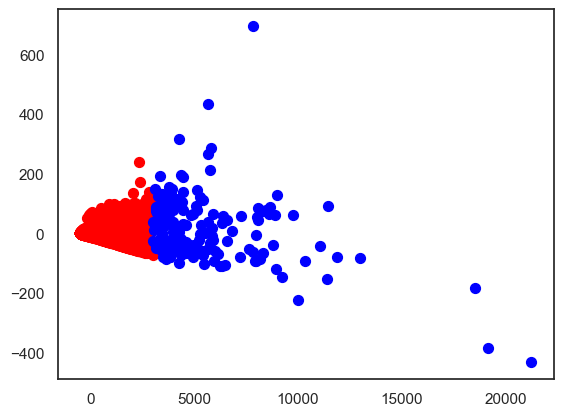

In [41]:
plt.scatter(df_pca[labels==0, 0], df_pca[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(df_pca[labels==1, 0], df_pca[labels==1, 1], s=50, marker='o', color='blue')
plt.show()

In [48]:
df_def['Predicted clusters Agglo']= model.labels_
df_def

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_interacciones,Predicted clusters K-M,cluster,Predicted clusters Agglo
0,3,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0,1303,2,cluster_3,0
1,1,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0,150,0,cluster_1,0
2,3,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0,520,0,cluster_1,0
3,1,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0,111,0,cluster_1,0
4,1,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0,213,0,cluster_1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1,0.146040,-0.173913,0.00,0.184799,0.000000,0.0,0.0,0.0,0.0,89,0,cluster_1,0
7046,1,-0.215347,-0.173913,0.00,-0.262295,0.333333,0.0,1.0,0.0,0.0,16,0,cluster_1,0
7047,1,-0.284653,-0.173913,0.00,-0.339791,0.333333,0.0,0.0,0.0,0.0,2,0,cluster_1,0
7048,1,1.443069,0.347826,5.50,1.734724,0.666667,0.0,0.0,0.0,0.0,385,0,cluster_1,0


## Exercici 3
**Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.**

In [65]:
#El índice de rendimiento Silhouette se usa para evaluar la calidad de los clústeres obtenidos con los algoritmos de agrupación.
#Se calcula la distancia entre cada muestra y todos los demás puntos de cada cluster, después se calcula media y se obtiene la distancia media.
#El valor del índice Silhouette está entre -1 y 1. El cluster es denso y está bien diferenciado cuando el índice se acerca a 1, si se acerca a 0 hay clústeres sobrepuestos y las muestras están muy cerca de los límites con otros clústeres. Si el valor es -1 indica que hay muestras asignadas a clústeres incorrectos.

from sklearn.metrics import silhouette_score

In [57]:
# Calculamos el rendimiento de la agrupación hecha con AgglomerativeClustering.
aglo_silhouette = silhouette_score(df_pca, model.labels_).round(2)

print("Silhouette score for numerical clusters:", aglo_silhouette)

Silhouette score for numerical clusters: 0.88


In [58]:
df_def['cluster_aglo'] = df_def['Predicted clusters Agglo'].map({0:'cl_ag_1', 1:'cl_ag_2'})

In [59]:
df_def['cluster_aglo'].value_counts()

cl_ag_1    6868
cl_ag_2     182
Name: cluster_aglo, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Tipo de interacción por cluster')

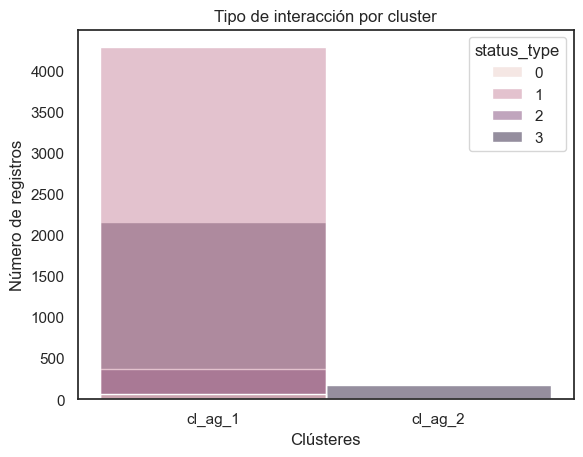

In [60]:
sns.histplot(x=df_def['cluster_aglo'], hue=df_def['status_type'])
plt.xlabel('Clústeres')
plt.ylabel('Número de registros')
plt.title('Tipo de interacción por cluster')

In [61]:
# Calculamos el rendimiento del clustering hecho con KMeans.
cl_silhouette = silhouette_score(df_pca, cl_3.labels_).round(2)

print("Silhouette score for numerical clusters:", cl_silhouette)

Silhouette score for numerical clusters: 0.82


In [62]:
df_def['cluster_km'] = df_def['Predicted clusters K-M'].map({0:'cl_km_1', 1:'cl_km_2', 2:'cl_km_3'})

In [63]:
df_def['cluster_km'].value_counts()

cl_km_1    6165
cl_km_3     775
cl_km_2     110
Name: cluster_km, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Tipo de interacción por cluster')

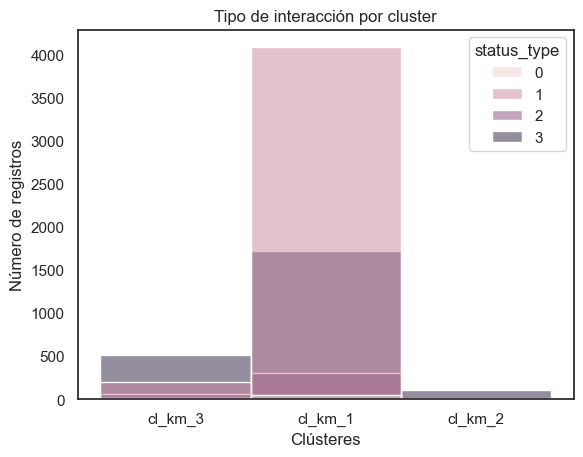

In [64]:
sns.histplot(x=df_def['cluster_km'], hue=df_def['status_type'])
plt.xlabel('Clústeres')
plt.ylabel('Número de registros')
plt.title('Tipo de interacción por cluster')

*Agglomerativeclustering da mejores resultados con dos clusters que el kmeans con 3*